<a href="https://colab.research.google.com/github/KarlaMichelleSorianoSanhez/EDP-1/blob/main/Richardson(m%C3%A9todo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO IMPLÍCITO DE RICHARDSON

##PLANTEAMIENTO DEL PROBLEMA

El objetivo es aproximar la solución de la ecuación de calor:
:
$$\frac{∂u}{∂t}(x,t)=\frac{∂^2u}{∂x^2}(x,t) \quad 0<x<1, \quad 0<t $$

Sujeto a las condiciones de frontera
$$u(0,t)=0, \qquad u(1,t)=0$$

y condición inicial
$$u(x,0)=\sin(\pi x), \quad 0 \le x\le 1$$

Usaremos el método de Richardson (diferencias regresivas), para ello consideraremos los valores:

$h=0.1 \quad k=0.01 \quad α=1$


##1. Calcular el parámetro de $λ$

Es cual esta definido como la razon de:
$$λ=\frac{\alpha^2 k}{h^2}$$

Sustituyendo los valores obtengo:

$$λ=\frac{(1)^2 (0.01)}{(0.1)^2} =1$$

Este valor determina los coeficientes del sistema lineal que aparece en el esquema ímplicito.


##2. Ecuación de diferencias regresivas.

Utilizaremos la formula de diferencias regresivas para la derivada temporal,

$$\frac{u_{i,j}-u_{i,j-1}}{k}$$

Y diferencias centradas para la segunda derivada espacial,

$$\frac{u_{i+1,j}-2u_{i,j} + u_{i-1, j}}{h^2}$$

Sustituyendo en la ecuación de calor obtenemos:

$$\frac{u_{i,j}-u_{i,j-1}}{k}= \frac{u_{i+1,j}-2u_{i,j} + u_{i-1, j}}{h^2} $$

Multiplicando por $k$ y definimos $λ=\frac{\alpha^2 k}{h^2}$

$$ u_{i,j} -u_{i,j-1}=
λ (u_{i+1,j} - 2u_{i,j}+ u_{i-1,j})$$

Reordenando:

$$(1-2 λ)u_{i,j} -λu_{i+1,j} -λu_{i-1,j} = u_{i,j-1} $$

Como $\lambda = 1$:

$$
3u_{i,j} - u_{i+1,j} - u_{i-1,j} = u_{i,j-1}.
$$

NOTA: ESTA CUACIAÓN SE UTILIZARA PARA CONSTRUIR EL SISTEMA DE ECUACIONES LINEALES EN CADA PASO

##3. Construir el sistema de ecuaciones para el primer paso de tiempo

Considerando que nos moveremos en el tiempo, para $j=1$ , el lado derecho se obtiene de la condición inicial.

$$
u_{i,0} = \sin(\pi x_i), \qquad x_i = 0.1, 0.2, \ldots, 0.9.
$$


Sustituyendo $i= 1, …, 9 $, obtenemos:


$$
\begin{aligned}
3u_{1,1} - u_{2,1} &= u_{1,0},\\[2mm]
-\,u_{1,1} + 3u_{2,1} - u_{3,1} &= u_{2,0},\\[2mm]
-\,u_{2,1} + 3u_{3,1} - u_{4,1} &= u_{3,0},\\[2mm]
\vdots & \\[2mm]
-\,u_{8,1} + 3u_{9,1} &= u_{9,0}.
\end{aligned}
$$


Este sitema es equivalente a decir
$$A\,u^{(1)} = b,$$

donde $A$ es la matriz tridiagonal, es decir la diagonal $3$ y en las sub/superdiagonal $-1$. Además

$$
b = \bigl(f(0.1), f(0.2), \ldots, f(0.9)\bigr)^T.
$$


Entonces para el paso $j=1$ tengo el sistema:
$$
\begin{aligned}
3u_{1,1} - u_{2,1} - u_{0,1} &= f(0.1),\\[2mm]
3u_{2,1} - u_{3,1} - u_{1,1} &= f(0.2),\\[2mm]
3u_{3,1} - u_{4,1} - u_{2,1} &= f(0.3),\\[4mm]
3u_{4,1} - u_{5,1} - u_{3,1} &= f(0.4),\\[2mm]
3u_{5,1} - u_{6,1} - u_{4,1} &= f(0.5),\\[2mm]
3u_{6,1} - u_{7,1} - u_{5,1} &= f(0.6),\\[4mm]
3u_{7,1} - u_{8,1} - u_{6,1} &= f(0.7),\\[2mm]
3u_{8,1} - u_{9,1} - u_{7,1} &= f(0.8),\\[2mm]
3u_{9,1} - u_{10,1} - u_{8,1} &= f(0.9).
\end{aligned}
$$












## 4. Construir la matriz $A$ y el vector $b$


A partir de la ecuación en diferencias regresivas
$$
3u_{i,j} - u_{i+1,j} - u_{i-1,j} = u_{i,j-1}, \qquad i=1,\ldots,9,
$$
observamos que en cada ecuación:
- el  coeficiente de $u_{i,j}$ es $3$,
- los coeficientes de $u_{i-1,j}$ y $u_{i+1,j}$ son $-1$,
- no aparecen otros términos.

Esto significa que el sistema puede escribirse como una matriz tridiagonal de la forma:

$$
A =
\begin{pmatrix}
3 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
-1 & 3 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -1 & 3 & -1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -1 & 3 & -1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -1 & 3 & -1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -1 & 3 & -1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -1 & 3 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 3 & -1 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & -1 & 3
\end{pmatrix}.
$$

Esta forma es equivalente a todas las ecuaiones obtenidas en la parte anterior

\

El lado derecho del sistema proviene de la condición inicial:
$$
u(x,0)=f(x)=\sin(\pi x).
$$

En los nodos internos
$$
x_i = 0.1,\; 0.2,\; \ldots,\; 0.9,
$$
tenemos:$$
u_{i,0}=f(x_i).
$$
Por lo tanto,
$$
b =
\begin{pmatrix}
f(0.1) \\
f(0.2) \\
f(0.3) \\
f(0.4) \\
f(0.5) \\
f(0.6) \\
f(0.7) \\
f(0.8) \\
f(0.9)
\end{pmatrix}.
$$

En Python, esto puede escribirse con un solo renglón usando una comprensión de listas, pero matemáticamente representa exactamente los valores iniciales del método de Richardson.




In [37]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # necesario para 3D
from matplotlib import cm  # colormap

In [38]:
def f(x):
    return np.sin(np.pi*x)

In [39]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

In [40]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

##Ejercicio 1: Codificar la matriz A de manera más simple.

Se puede hacer mediante:

- OPCIÓN 1: Para matrices donde $n$ es muy grande consume más memoria y tarda más

- OPCIÓN 2:Utiliando *scipy.sparse.diags*, la cual permite construir matrices dispersas a partir de sus diagonales. Esta opción es más efectiva para matrices grandes.


In [54]:
n=9 # es el número de nodos internos
"""
A puede escribirse de forma automatica utilidando matrices indentidad desplazadas, es decir :

A=3I-T
donde
I= matriz identidad
T=  contiene unos en la subdiagonal y superdiagonal.

\texttt{np.eye} para los desplazamientos.

np.eye(n) crea la matriz identidad de 9x9
np.eye(n,k=1) crea una matriz de 1 en la superdiagonal
np.eye(n,k=-1) crea una matriz de 1 en la subdiagonal
Restarlas produce los -1 en esas pocisiones
Multiplicarlas por 3 la identidad da la matriz A.
"""
A=3*np.eye(n) -np.eye(n,k=1) -np.eye(n,k=-1)
A= sp.Matrix(A)

In [55]:
from scipy.sparse import diags

def matriz_A (n=9):

  """
  Construye la matriz A, que corrresponde al método implicito de Richardson para la ecuacion de calor.

  diag(3) -> diagonal principal
  diag (-1, +1) -> superdiagonal
  diag(-1,-1) -> subdiagonal

  Devuelve la matriz A
"""

  #Definir diagonales

  diag_principal= 3*np.ones(n)
  diag_superior= -1 * np.ones(n-1)
  diag_inferior= -1 * np.ones(n-1)

  #construir la matriz dispersa (sparse)

  A_sparse = diags (
      [diag_principal, diag_inferior, diag_superior],
      [0, -1, 1],
      shape=(n,n)
  )

  #convertimos a una matriz de SymPy
  return sp.Matrix(A_sparse.toarray())

#Consturir la matriz A
A=matriz_A(9)

A


Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0]])

## Ejercicio 2: Definir las entradas de b de manera más simple (quizás con un bucle).

Como en este problema se usa el paso $h=0.1$ los nodos interioes quedan dados por:
$$
x_i = 0.1i, \qquad i = 1,\dots,9.
$$

La condición inicial es:
$$
u(x,0) = f(x) = \sin(\pi x),
$$
por lo que cada entrada del vector se obtiene mediante:
$$
b_i = f(x_i) = \sin(\pi\cdot 0.1i).
$$

In [42]:
#Función inicial del problema u(x,0)=sin(pi*x)

def f(x):
  return np.sin(np.pi *x)
"""
Nodos interiores en i: 0.1, 0.2, ... , 0.9
Para generarlos de manera más rapida i*0.1 donde h=0.1
"""
x_internos = [i * 0.1 for i in range (1, 10)]

#De modo que el vector b se construye en la en¿valuación en los nodos
b =sp.Matrix ([f(x) for x in x_internos])
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [43]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

Definimos función para Richarson (diferencias regresivas)

In [44]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [45]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

In [56]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

##Ejercicio 4: Graficar para un valor particular de t > 0 y comparar contra la gráfica de la solución exacta (quizás necesite calcularla).

Para este problema la ecuación de calor en el intervalo $0<x<1$ con condiones de frontera homogeneas y consición inicial $u(x,0)=\sin(\pi x)$ tiene una solución exacta conocida.

Usando separación de variables, la solución analítica es:

$$
u(x,t) = e^{-\pi^2 t}\,\sin(\pi x).
$$

La idea es que una vez obtenida la solución numérica con el método de Richardson, es prudente comparar ambas soluciones tomando un valor fijo de tiempo

In [58]:
#Solución exacta de la ecuaión de calor
def solucion_exacta(x,t):
  """
  Solución exacta del problema de Dirichlet:
  u(x,t) = e^{-π^2 t} · sin(πx)
  """
  return np.exp(-(np.pi**2)*t) * np.sin(np.pi * x)


In [ ]:
#parametros de problema
k=0.01                #paso de tiempo
iteraciones= 5         #numero de pasos de Richardson
t_valor =iteraciones*k #tiempo equivalente

In [59]:
#solucion numerica utlizando Richardson
S = richardson (A,b,iteraciones)
u_numerica= S[-1]    #considera la untima iteración


In [60]:
#Nodos espaciales internos, donde se definio la solución: 0.1, ..., 0.9
x_numerico=np.linspace (0.1,0.9,9)


In [61]:
#Solución exacta con los mismso nodos
u_exacta =solucion_exacta(x_numerico, t_valor)


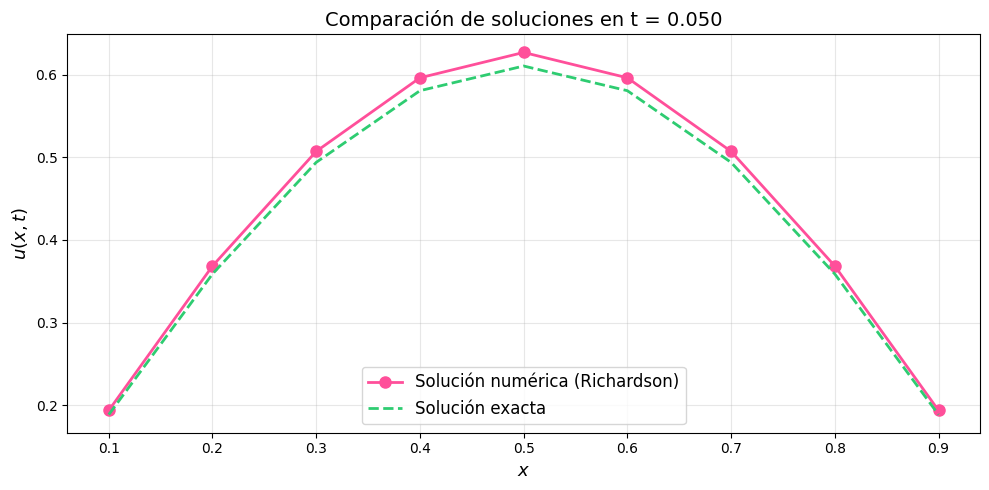

In [62]:
# Grafica comparativa

plt.figure(figsize=(10,5))

# Solución numérica – color ROSA
plt.plot(x_numerico, u_numerica,
         marker='o', markersize=8,
         color='#ff4f9a', linewidth=2,
         label='Solución numérica (Richardson)')

# Solución exacta – color VERDE
plt.plot(x_numerico, u_exacta,
         linestyle='--', linewidth=2,
         color='#2ecc71',
         label='Solución exacta')

plt.xlabel('$x$', fontsize=13)
plt.ylabel('$u(x,t)$', fontsize=13)
plt.title(f'Comparación de soluciones en t = {t_valor:.3f}',
          fontsize=14)

plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


##Ejercicio 5:¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

Considerando que estamos resolviendo la cuación de calor con condición inicial $f(x)=\sin (\pi x)$
la cual es definida como una función simetrica, asi que la solución númerica $u(x,t)$ también lo es.

$$
u_1 = u_9,\quad
u_2 = u_8,\quad
u_3 = u_7,\quad
u_4 = u_6.
$$

Eso significa que solo necesito calcular los valores correcpondientes a la mitad izquierda de la malla

$$
u_1,\, u_2,\, u_3,\, u_4,\, u_5.
$$

De este modo, en lugar de resolver el sitema de $9\times 9$, podemos trabajar con un *sistema reducido de* $5\times 5$ cuya matriz tridiagonal queda:

$$
A=
\begin{pmatrix}
3 & -1 & 0 & 0 & 0\\
-1 & 3 & -1 & 0 & 0\\
0 & -1 & 3 & -1 & 0\\
0 & 0 & -1 & 3 & -1\\
0 & 0 & 0 & -1 & 3
\end{pmatrix}.
$$

El sistema de ecuaciones correspondiente es:

$$
\begin{aligned}
3u_1 - u_2 &= f(0.1),\\
-\,u_1 + 3u_2 - u_3 &= f(0.2),\\
-\,u_2 + 3u_3 - u_4 &= f(0.3),\\
-\,u_3 + 3u_4 - u_5 &= f(0.4),\\
-\,u_4 + 3u_5 &= f(0.5).
\end{aligned}
$$

Finalmente podemos concluir que no es necesario resolver el sistema completo de $9\times 9$. Gracias a la simetría de $f(x)$, asi que podemos trabajar con un sistema reducido de $5\times 5$ sin tener perdidas de información.



In [49]:
j = 20 # Número de pasos en el tiempo

In [50]:
U=richardson(A, b, j)

In [51]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

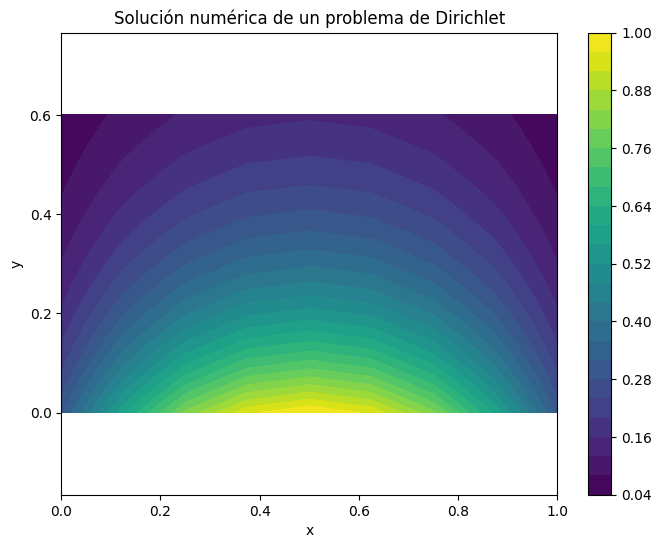

In [52]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de Dirichlet')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

##Explicación de la grafica

En esta figura se muestra como cambia la solución numerica de la ecuación de calor obtenida mediante el método implicito dee Richardson.

El eje horizontal correponde a los valores de $x$ dentro del intervalo $(0,1)$.

El eje vertical corresponde a los disitintos pasos de tiempo que igualmente fueron calculados con el método.

Los colores son indicadores de la temperatura $u(x,t)$:

- Tonos claros son los valores mas altos
- Tonos oscuros valores más bajos.   

Se observa como la distribución inicial, dada por
$u(x,0)=\sin(\pi x)$, comienza con un pico alrededor de $x=0.5$ y conforme avanza los pasos de tiempo la temperarura va difuminado de manera suave.
Entonde spodemos decir que la solución pierde intensidad ya que decae exponencialmente pero mantiene su forma simetrica, y esto se debe a que tambien  condición inicial es simetrica en $x=0.5$.  

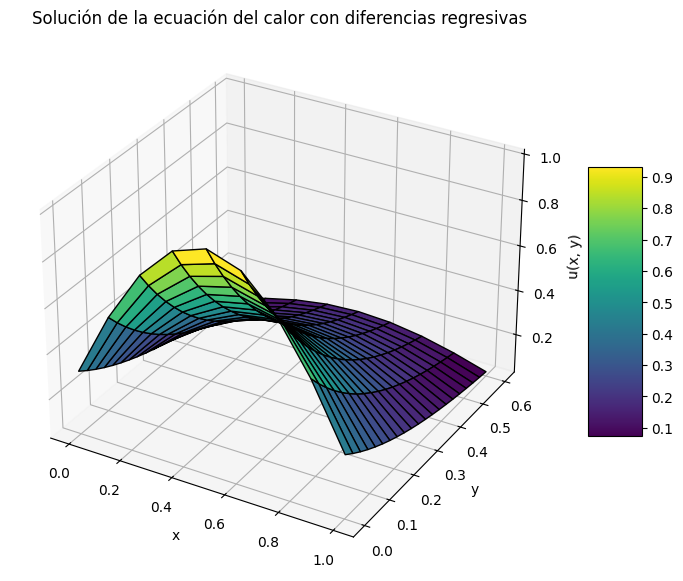

In [53]:
%matplotlib inline
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con diferencias regresivas')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

## Explicación de la grafica
Patiendo de $t=0$ , la solución parte de la considión inicial, lo cual genera una curva que alcanza su maximo puto en $x= 0.5$.

Conforme avanza el tiempo, la amplitud empiza a disminuir de manera exponencial debido al termino $e^{-\pi^2 t}$. Esto refleja la disminusión de calor.

Por otro lado para el tiempo $t=0.6$, el factor exponencial es muy pequeño ($e^{-\pi^2(0.6)}\approx 0.015$), eso quiere decir que toda la superficie esta cerca a 0.

En general esta grafica muestra la dispersión de temperatura.

##Ejercicio 6: Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

El detalle que afecta la precisión de las graficas tiene que ver tnto en el **espaciado de x** como con la **escala temporal**

I. **La malla en x es demasiado gruesa**
En el codigo se uso *x=np.linspace(0,1,9)*, eso quiere decir que, uso solo 9 puntos para repsesentar toda la solución.

Un tamaño de esa magnitud hace que la solución:
- No tenga la forma suave que nos gustaria
- No aparezca de menra continua completa
- No describa bien la forma de la función $sin(\pi x)$, la cual es suave.

Es por eso que al intentar dibujar una curva con muy pocos puntos, la grafica tiene una precisión limitada.


II. **La escala temporal**
Considerando que el tiempo utilizado es $t=j.k$, dado que los gráficos interpretan cada iteración como si fuera una unidad de tiempo. Es por eso que el valor maximo que aparece es 0.6.

Es decir Richardson no avanza en tiempo fisico, sino en iteracioneds del método. Entonces:

- La gráfica parece mostrar como cambia la solución en el tiempo pero en realidad solo muestra como cambian las iteraciones, no el tiempo verdadero.

Finalmente las graficas, estan hechas con muy pocos puntos y no representan tiempo real, sino iteraciones del método. Por eso la solución solo es una aproximación.









